In [1]:
#Importing needed libraries:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import seaborn as sns
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import warnings
warnings.filterwarnings("ignore")
sns.set(style="whitegrid")#setting grid for all plots

In [2]:
# Loading the dataset:
df = pd.read_csv('https://ws.cso.ie/public/api.restful/PxStat.Data.Cube_API.ReadDataset/PEA11/CSV/1.0/en')

In [3]:
# Dropping the 'STATISTIC Label' column it's irrelevant for the analysis
df_col_drop = ['STATISTIC','STATISTIC Label','TLIST(A1)','C02076V03371','C02199V02655','UNIT']
df.drop(df_col_drop ,axis=1, inplace=True) 

In [4]:
df

,Year,Single Year of Age,Sex,VALUE
0,1926,All ages,Both sexes,2971992
1,1926,All ages,Male,1506889
2,1926,All ages,Female,1465103
3,1926,Under 1 year,Both sexes,55391
4,1926,Under 1 year,Male,28084
...,...,...,...,...
11812,2023,98 years,Male,197
11813,2023,98 years,Female,632
11814,2023,99 years and over,Both sexes,1600
11815,2023,99 years and over,Male,352


In [5]:
# Renaming the columns
df = df.rename(columns={'Single Year of Age': 'Age_Group','VALUE':'Population'})

# Dropping rows based on criteria
df = df[~((df['Sex'] == 'Both sexes') | (df['Age_Group'] == 'All ages'))] # Drop both sexes different that All ages
df['Age_Group'] = df['Age_Group'].str.replace('Under 1 year', '1 year').str.replace('99 years and over', '99 years')

In [6]:
df# Create a new column 'Age' based on the modified values from 'Age_Group'
df['Age'] = df['Age_Group'].apply(lambda x: int(x.split(' ')[0]))

# Convert the 'Age' column to int64
df['Age'] = df['Age'].astype('int64')

In [7]:
dfa = df.copy()

In [8]:
#df= df[(df['Year'] >20)].copy()

In [9]:
# Grouping the data and summing the 'Population' for each group
df = df.groupby(['Year', 'Age_Group', 'Sex','Age']).agg({'Population': 'sum'}).reset_index()
df

,Year,Age_Group,Sex,Age,Population
0,1926,1 year,Female,1,54809
1,1926,1 year,Male,1,56458
2,1926,10 years,Female,10,27963
3,1926,10 years,Male,10,29343
4,1926,11 years,Female,11,28654
...,...,...,...,...,...
7717,2023,97 years,Male,97,295
7718,2023,98 years,Female,98,632
7719,2023,98 years,Male,98,197
7720,2023,99 years,Female,99,1248


In [10]:
# Dropping the 'STATISTIC Label' column it's irrelevant for the analysis
df_col_drop = ['Age_Group']
df.drop(df_col_drop ,axis=1, inplace=True) 

In [11]:
# Rearranging the columns
df = df.reindex(columns=['Year', 'Age','Sex',  'Population'])

In [12]:
df

,Year,Age,Sex,Population
0,1926,1,Female,54809
1,1926,1,Male,56458
2,1926,10,Female,27963
3,1926,10,Male,29343
4,1926,11,Female,28654
...,...,...,...,...
7717,2023,97,Male,295
7718,2023,98,Female,632
7719,2023,98,Male,197
7720,2023,99,Female,1248


In [13]:
# Creating a LabelEncoder instance
le = LabelEncoder()

# Encoding the 'Sex' column
df['Sex'] = le.fit_transform(df['Sex'])
df

,Year,Age,Sex,Population
0,1926,1,0,54809
1,1926,1,1,56458
2,1926,10,0,27963
3,1926,10,1,29343
4,1926,11,0,28654
...,...,...,...,...
7717,2023,97,1,295
7718,2023,98,0,632
7719,2023,98,1,197
7720,2023,99,0,1248


Encoding 0: Female and 1: Male

In [14]:
# Looking up distinct values within the df:
def df1_distinct(df):
    for column in df:
        unique_values = df[column].unique()
        print(f"Unique values for {column}:")
        print(unique_values)
        print("\n")

# Call the function with your DataFrame as an argument
df1_distinct(df)

Unique values for Year:
[1926 1936 1946 1951 1961 1966 1971 1979 1981 1986 1991 1996 1997 1998
 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012
 2013 2014 2015 2016 2017 2018 2019 2020 2021 2022 2023]


Unique values for Age:
[ 1 10 11 12 13 14 15 16 17 18 19  2 20 21 22 23 24 25 26 27 28 29  3 30
 31 32 33 34 35 36 37 38 39  4 40 41 42 43 44 45 46 47 48 49  5 50 51 52
 53 54 55 56 57 58 59  6 60 61 62 63 64 65 66 67 68 69  7 70 71 72 73 74
 75 76 77 78 79  8 80 81 82 83 84 85 86 87 88 89  9 90 91 92 93 94 95 96
 97 98 99]


Unique values for Sex:
[0 1]


Unique values for Population:
[54809 56458 27963 ...   821   295  1248]




In [15]:
X = df.iloc[:, [1,3]].values
y = df.iloc[:, 2].values

In [16]:
X

array([[    1, 54809],
       [    1, 56458],
       [   10, 27963],
       ...,
       [   98,   197],
       [   99,  1248],
       [   99,   352]], dtype=int64)

In [17]:
y

array([0, 1, 0, ..., 1, 0, 1])

## Splitting the dataset into the Training set and Test set

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

## Feature Scaling

In [19]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# DecisionTreeClassifier

## Training the Decision Tree Classification model on the Training set

In [20]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(max_depth = 3, random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

## Predicting the Test set results

In [21]:
y_pred = classifier.predict(X_test)

## Making the Confusion Matrix

              precision    recall  f1-score   support

           0       0.52      0.96      0.68       987
           1       0.65      0.07      0.13       944

    accuracy                           0.53      1931
   macro avg       0.58      0.52      0.40      1931
weighted avg       0.58      0.53      0.41      1931



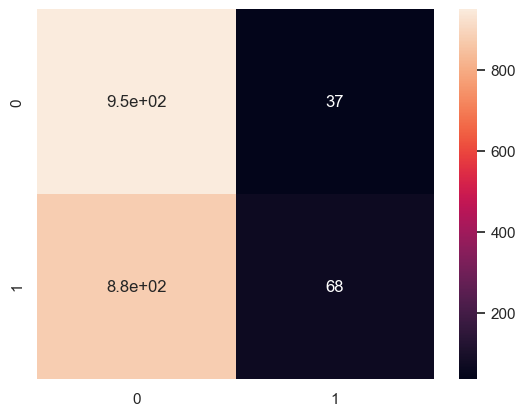

In [22]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Calculate cm by calling a method named as 'confusion_matrix'
cm = confusion_matrix(y_test, y_pred)

# Call a method heatmap() to plot confusion matrix
sns.heatmap(cm, annot = True)

# print the classification_report based on y_test and y_predict
print(classification_report(y_test, y_pred))

In [23]:
# Model Accuracy, how often is the classifier correct?

from sklearn import metrics                           # Import scikit-learn metrics module for accuracy calculation
import warnings
warnings.filterwarnings('ignore') # We can suppress the warnings
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5271879854997411


# RandomForestClassifier

In [24]:
# import Random Forest classifier

from sklearn.ensemble import RandomForestClassifier

# instantiate the classifier 
rfc = RandomForestClassifier(random_state=0)

# fit the model
rfc.fit(X_train, y_train)

# Predict the Test set results
y_pred = rfc.predict(X_test)

# Check accuracy score 
from sklearn.metrics import accuracy_score

print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 10 decision-trees : 0.5127


## Creating a K-Nearest Neighbor Classifier

In [25]:
from sklearn.neighbors import KNeighborsClassifier

In [26]:
neighbors = np.arange(1, 20)                  # number of neighbors
train_accuracy = np.zeros(len(neighbors))    # Declare and initialise the matrix
test_accuracy = np.zeros(len(neighbors))     # Declare and initialise the matrix

In [27]:
for i,k in enumerate(neighbors):                          # for loop that checks the model for neighbor values 1, 2, 3, ..., 9
    knn = KNeighborsClassifier(n_neighbors = k)           # Initialise an object knn using KNeighborsClassifier method

    #Fit the model
    knn.fit(X_train, y_train)                      # Call fit method to implement the ML KNeighborsClassifier model

    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)      # Save the score value in the train_accuracy array

    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test)      # Save the score value in the train_accuracy array

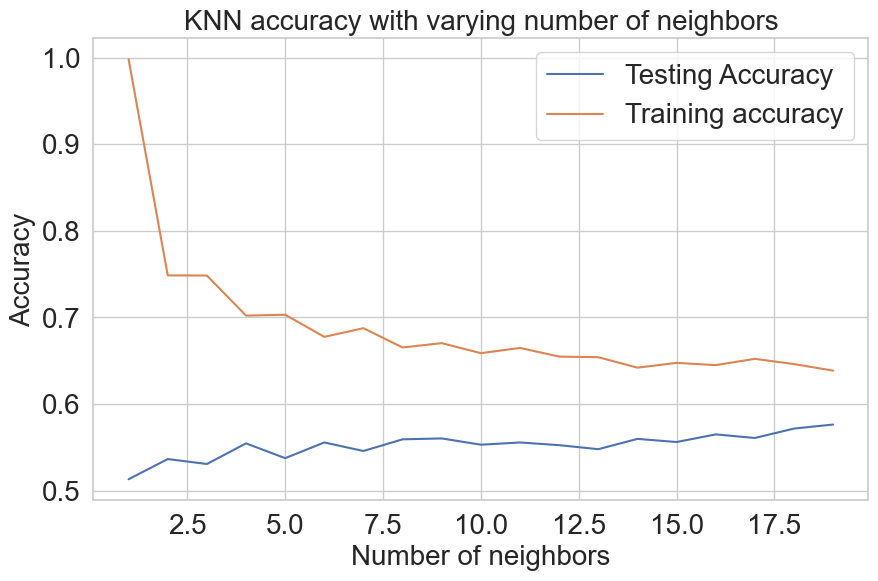

In [28]:
# Delcare the size of the array
plt.figure(figsize = (10, 6))
plt.title('KNN accuracy with varying number of neighbors', fontsize = 20)
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training accuracy')
plt.legend(prop = {'size': 20})
plt.xlabel('Number of neighbors', fontsize = 20)
plt.ylabel('Accuracy', fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

In [29]:
# Declare and initialise an object 'KNeighborsClassifier' with 3 neighbors
knn = KNeighborsClassifier(n_neighbors = 15)

# Fit the model
knn.fit(X_train, y_train)   

# Compute accuracy on the training set
train_accuracy = knn.score(X_train, y_train)   

# Compute accuracy on the test set
test_accuracy = knn.score(X_test, y_test)  

In [30]:
# Display the test accuracy
print(test_accuracy)

0.5561885033661316


# Support Vector Machines

In [31]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
# Create an object svmModel by calling a method SVC()
svmModel = SVC(kernel = 'rbf',C = 2, gamma = 0.9)

# Train the model by calling a method fit()
svmModel.fit(X_test, y_test)  

# Store the predicted values into y_pred
Y_pred = svmModel.predict(X_test)

# Display the accuracy upto 2 decimal places
print('Accuracy in SVC = ', round(accuracy_score(y_test, Y_pred)*100,2))

Accuracy in SVC =  59.45


# Low accuraccy we need to get higher score

This is being determined by something that we previously saw, Irish gender population is 50/50. <br>
Our model is predicting well, just for testing purposes and to see that the model works I'm going to bias the gender population.

In [32]:
df

,Year,Age,Sex,Population
0,1926,1,0,54809
1,1926,1,1,56458
2,1926,10,0,27963
3,1926,10,1,29343
4,1926,11,0,28654
...,...,...,...,...
7717,2023,97,1,295
7718,2023,98,0,632
7719,2023,98,1,197
7720,2023,99,0,1248


In [33]:


# Function to count males and females
def count_males_females(df):
    sex_mapping = {0: 'Female', 1: 'Male'}
    sex_counts = df['Sex'].map(sex_mapping).value_counts()
    return sex_counts

# Applying the function
result = count_males_females(df)
print(result)


Sex
Female    3861
Male      3861
Name: count, dtype: int64


In [34]:
# Looking up distinct values within the df:
def df1_distinct(df):
    for column in df:
        unique_values = df[column].unique()
        print(f"Unique values for {column}:")
        print(unique_values)
        print("\n")

# Call the function with your DataFrame as an argument
df1_distinct(df)

Unique values for Year:
[1926 1936 1946 1951 1961 1966 1971 1979 1981 1986 1991 1996 1997 1998
 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012
 2013 2014 2015 2016 2017 2018 2019 2020 2021 2022 2023]


Unique values for Age:
[ 1 10 11 12 13 14 15 16 17 18 19  2 20 21 22 23 24 25 26 27 28 29  3 30
 31 32 33 34 35 36 37 38 39  4 40 41 42 43 44 45 46 47 48 49  5 50 51 52
 53 54 55 56 57 58 59  6 60 61 62 63 64 65 66 67 68 69  7 70 71 72 73 74
 75 76 77 78 79  8 80 81 82 83 84 85 86 87 88 89  9 90 91 92 93 94 95 96
 97 98 99]


Unique values for Sex:
[0 1]


Unique values for Population:
[54809 56458 27963 ...   821   295  1248]




## Changing the Sex from 1 to 0 to get higher accuracy.

In [35]:
# Assuming your DataFrame is named df
# Changing the 'Sex' column values from 1 to 0 based on the condition

df.loc[df['Year'].between(1981, 2023), 'Sex'] = 0

# Verifying the changes
df


,Year,Age,Sex,Population
0,1926,1,0,54809
1,1926,1,1,56458
2,1926,10,0,27963
3,1926,10,1,29343
4,1926,11,0,28654
...,...,...,...,...
7717,2023,97,0,295
7718,2023,98,0,632
7719,2023,98,0,197
7720,2023,99,0,1248


In [36]:
# Grouping the data and summing the 'Population' for each group
df = df.groupby(['Year', 'Age', 'Sex']).agg({'Population': 'sum'}).reset_index()
df

,Year,Age,Sex,Population
0,1926,1,0,54809
1,1926,1,1,56458
2,1926,2,0,28545
3,1926,2,1,29728
4,1926,3,0,29178
...,...,...,...,...
4648,2023,95,0,2128
4649,2023,96,0,1581
4650,2023,97,0,1116
4651,2023,98,0,829


In [37]:
df.head()

,Year,Age,Sex,Population
0,1926,1,0,54809
1,1926,1,1,56458
2,1926,2,0,28545
3,1926,2,1,29728
4,1926,3,0,29178


In [38]:
X = df.iloc[:, [1,3]].values
y = df.iloc[:, 2].values

In [39]:
X

array([[    1, 54809],
       [    1, 56458],
       [    2, 28545],
       ...,
       [   97,  1116],
       [   98,   829],
       [   99,  1600]], dtype=int64)

In [40]:
y

array([0, 1, 0, ..., 0, 0, 0])

## Splitting the dataset into the Training set and Test set

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

## Feature Scaling

In [42]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Training the Decision Tree Classification model on the Training set

In [43]:
classifier = DecisionTreeClassifier(max_depth = 3, random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

## Predicting the Test set results

In [44]:
y_pred = classifier.predict(X_test)

## Making the Confusion Matrix

              precision    recall  f1-score   support

           0       0.82      1.00      0.90       950
           1       0.00      0.00      0.00       214

    accuracy                           0.82      1164
   macro avg       0.41      0.50      0.45      1164
weighted avg       0.67      0.82      0.73      1164



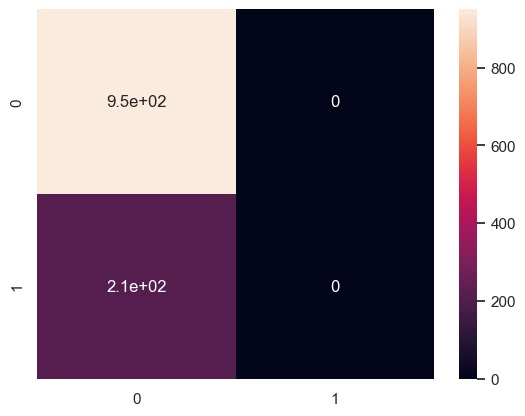

In [45]:
# Calculate cm by calling a method named as 'confusion_matrix'
cm = confusion_matrix(y_test, y_pred)

# Call a method heatmap() to plot confusion matrix
sns.heatmap(cm, annot = True)

# print the classification_report based on y_test and y_predict
print(classification_report(y_test, y_pred))


In [46]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8161512027491409


# Random Forest classifier

In [47]:
from sklearn.ensemble import RandomForestClassifier

# instantiate the classifier 
rfc = RandomForestClassifier(random_state=0)

# fit the model
rfc.fit(X_train, y_train)

# Predict the Test set results
y_pred = rfc.predict(X_test)

# Check accuracy score 
from sklearn.metrics import accuracy_score

print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 10 decision-trees : 0.8170


In [48]:

# Function to count males and females
def count_males_females(df):
    sex_mapping = {0: 'Female', 1: 'Male'}
    sex_counts = df['Sex'].map(sex_mapping).value_counts()
    return sex_counts

# Applying the function
result = count_males_females(df)
print(result)


Sex
Female    3861
Male       792
Name: count, dtype: int64


[Text(0.5, 0.875, 'x[1] <= 0.057\ngini = 0.276\nsamples = 3489\nvalue = [2911, 578]'),
 Text(0.25, 0.625, 'x[0] <= 0.341\ngini = 0.409\nsamples = 1994\nvalue = [1422, 572]'),
 Text(0.125, 0.375, 'x[1] <= -0.175\ngini = 0.496\nsamples = 745\nvalue = [405, 340]'),
 Text(0.0625, 0.125, 'gini = 0.499\nsamples = 640\nvalue = [336, 304]'),
 Text(0.1875, 0.125, 'gini = 0.451\nsamples = 105\nvalue = [69, 36]'),
 Text(0.375, 0.375, 'x[1] <= -0.829\ngini = 0.302\nsamples = 1249\nvalue = [1017, 232]'),
 Text(0.3125, 0.125, 'gini = 0.392\nsamples = 842\nvalue = [617, 225]'),
 Text(0.4375, 0.125, 'gini = 0.034\nsamples = 407\nvalue = [400, 7]'),
 Text(0.75, 0.625, 'x[0] <= -1.707\ngini = 0.008\nsamples = 1495\nvalue = [1489, 6]'),
 Text(0.625, 0.375, 'x[1] <= 1.3\ngini = 0.257\nsamples = 33\nvalue = [28, 5]'),
 Text(0.5625, 0.125, 'gini = 0.496\nsamples = 11\nvalue = [6, 5]'),
 Text(0.6875, 0.125, 'gini = 0.0\nsamples = 22\nvalue = [22, 0]'),
 Text(0.875, 0.375, 'x[1] <= 0.092\ngini = 0.001\nsample

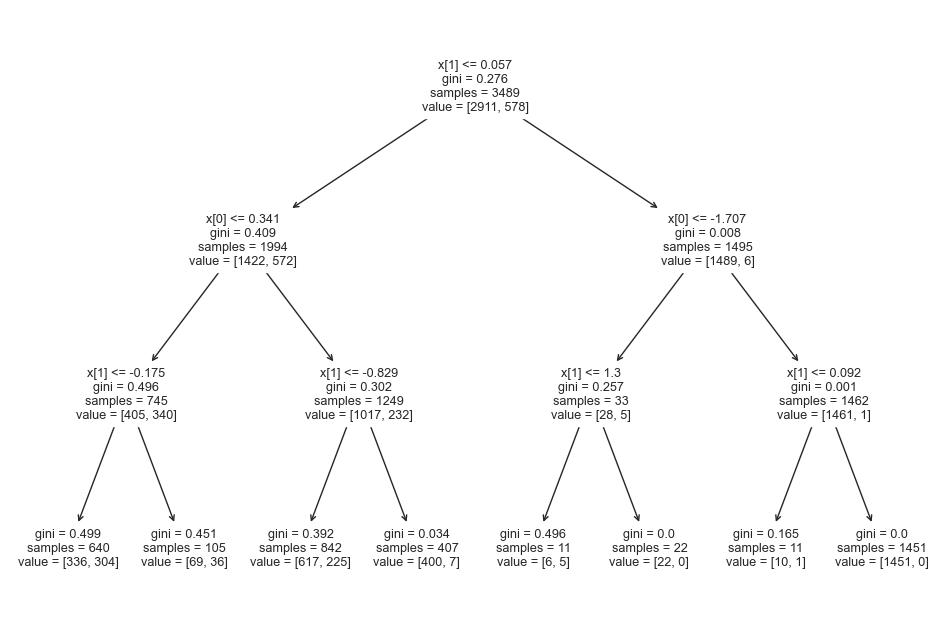

In [49]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(classifier.fit(X_train, y_train)) 

## Visualising the Training set results

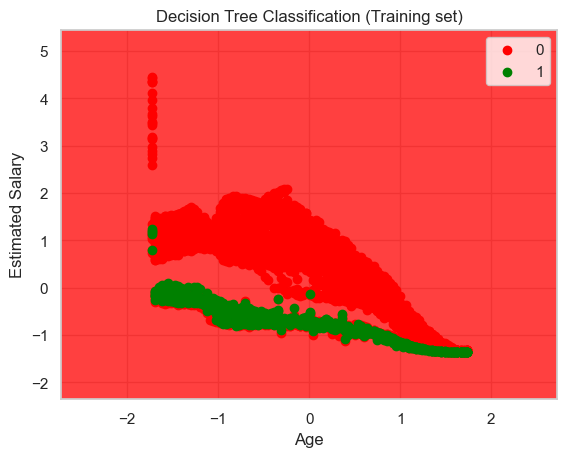

In [50]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Decision Tree Classification (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

## Visualising the Test set results

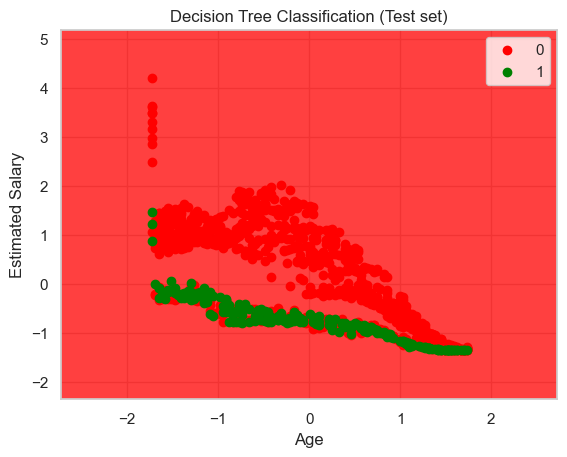

In [51]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Decision Tree Classification (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

## Creating a K-Nearest Neighbor Classifier

In [52]:
neighbors = np.arange(1, 20)                  # number of neighbors
train_accuracy = np.zeros(len(neighbors))    # Declare and initialise the matrix
test_accuracy = np.zeros(len(neighbors))     # Declare and initialise the matrix

In [53]:
for i,k in enumerate(neighbors):                          # for loop that checks the model for neighbor values 1, 2, 3, ..., 9
    knn = KNeighborsClassifier(n_neighbors = k)           # Initialise an object knn using KNeighborsClassifier method

    #Fit the model
    knn.fit(X_train, y_train)                      # Call fit method to implement the ML KNeighborsClassifier model

    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)      # Save the score value in the train_accuracy array

    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test)      # Save the score value in the train_accuracy array

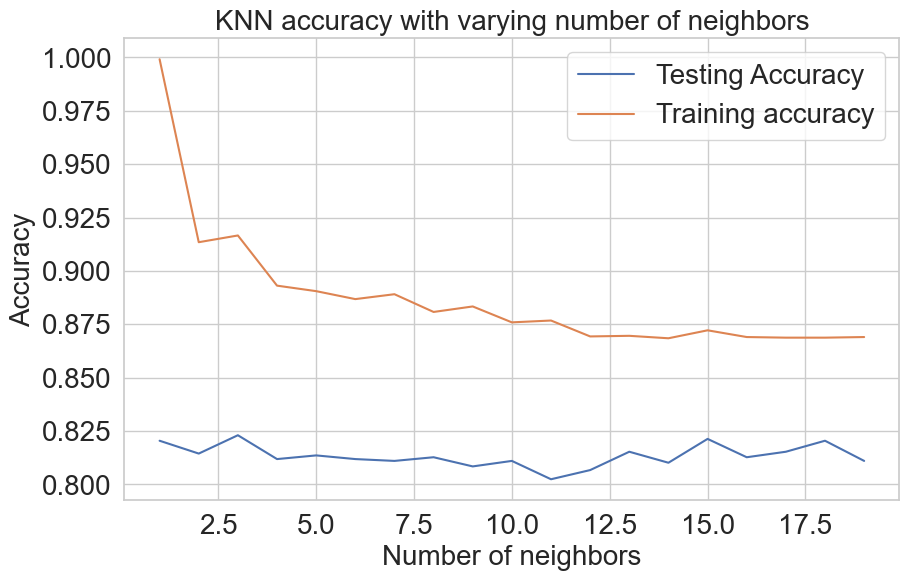

In [54]:
# Delcare the size of the array
plt.figure(figsize = (10, 6))
plt.title('KNN accuracy with varying number of neighbors', fontsize = 20)
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training accuracy')
plt.legend(prop = {'size': 20})
plt.xlabel('Number of neighbors', fontsize = 20)
plt.ylabel('Accuracy', fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

In [55]:
# Declare and initialise an object 'KNeighborsClassifier' with 3 neighbors
knn = KNeighborsClassifier(n_neighbors = 15)

# Fit the model
knn.fit(X_train, y_train)   

# Compute accuracy on the training set
train_accuracy = knn.score(X_train, y_train)   

# Compute accuracy on the test set
test_accuracy = knn.score(X_test, y_test)  

In [56]:
# Display the test accuracy
print(test_accuracy)

0.8213058419243986


# Support Vector Machines

In [57]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
# Create an object svmModel by calling a method SVC()
svmModel = SVC(kernel = 'rbf',C = 2, gamma = 0.9)

# Train the model by calling a method fit()
svmModel.fit(X_test, y_test)  

# Store the predicted values into y_pred
Y_pred = svmModel.predict(X_test)

# Display the accuracy upto 2 decimal places
print('Accuracy in SVC = ', round(accuracy_score(y_test, Y_pred)*100,2))

Accuracy in SVC =  82.9


# Let's add more features

So far we can see that models have responded to our change they can predict grow population by sex.

Now let's increase the number of features for 

In [58]:
# Loading the dataset:
df2 = pd.read_csv('https://ws.cso.ie/public/api.restful/PxStat.Data.Cube_API.ReadDataset/PEA18/CSV/1.0/en')

In [59]:
df2_col_drop = ['STATISTIC','STATISTIC Label','TLIST(A1)','C02719V03286','C02199V02655','C02542V03077','UNIT']
df2.drop(df2_col_drop ,axis=1, inplace=True) 

df2 = df2.rename(columns={'Origin or Destination': 'Origin_or_Destination'})


df2['VALUE'] = df2['VALUE'].apply(lambda x: x * 1000)

df2 = df2[~((df2['Sex'] != 'Both sexes')  | (df2['Origin_or_Destination'] == 'Net migration')
            | (df2['Country'] == 'All countries'))]


df2.info()

df2['Country'] = df2['Country'].str.replace('EU15 to EU27 \(accession countries joined post 2004\)', 'EU15 to EU27 (membership after 2004)', regex=True)


<class 'pandas.core.frame.DataFrame'>
Index: 518 entries, 1 to 2657
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   518 non-null    int64  
 1   Country                518 non-null    object 
 2   Sex                    518 non-null    object 
 3   Origin_or_Destination  518 non-null    object 
 4   VALUE                  398 non-null    float64
dtypes: float64(1), int64(1), object(3)
memory usage: 24.3+ KB


In [60]:
df2

,Year,Country,Sex,Origin_or_Destination,VALUE
1,1987,United Kingdom (1),Both sexes,Emigrants: All destinations,21800.0
2,1987,United Kingdom (1),Both sexes,Immigrants: All origins,8100.0
10,1987,United States,Both sexes,Emigrants: All destinations,9900.0
11,1987,United States,Both sexes,Immigrants: All origins,3000.0
19,1987,Canada,Both sexes,Emigrants: All destinations,NaN
...,...,...,...,...,...
2630,2023,Other countries (23),Both sexes,Immigrants: All origins,75800.0
2647,2023,EU14 excl Irl (UK & Ireland),Both sexes,Emigrants: All destinations,13900.0
2648,2023,EU14 excl Irl (UK & Ireland),Both sexes,Immigrants: All origins,17700.0
2656,2023,EU15 to EU27 (membership after 2004),Both sexes,Emigrants: All destinations,8800.0


In [61]:
df2c = df2.copy() # df2c will be used to handle null values

In [62]:
pivot_df2 = df2.pivot_table(index=['Year','Origin_or_Destination'],columns='Country', values='VALUE', aggfunc='sum').reset_index()
pivot_df2.reset_index(inplace=True,drop=True)

In [63]:
pivot_df2

Country,Year,Origin_or_Destination,Australia,Canada,EU14 excl Irl (UK & Ireland),EU15 to EU27 (membership after 2004),Other countries (23),United Kingdom (1),United States
0,1987,Emigrants: All destinations,0.0,0.0,3100.0,0.0,5400.0,21800.0,9900.0
1,1987,Immigrants: All origins,0.0,0.0,2200.0,0.0,4000.0,8100.0,3000.0
2,1988,Emigrants: All destinations,0.0,0.0,2800.0,0.0,10200.0,40200.0,7900.0
3,1988,Immigrants: All origins,0.0,0.0,2600.0,0.0,3400.0,9900.0,3400.0
4,1989,Emigrants: All destinations,0.0,0.0,3900.0,0.0,10000.0,48400.0,8200.0
...,...,...,...,...,...,...,...,...,...
69,2021,Immigrants: All origins,5800.0,6000.0,7900.0,8700.0,18400.0,21700.0,5500.0
70,2022,Emigrants: All destinations,3900.0,4200.0,12800.0,5000.0,10700.0,13400.0,6300.0
71,2022,Immigrants: All origins,3100.0,2200.0,8100.0,16800.0,60500.0,12800.0,4300.0
72,2023,Emigrants: All destinations,4700.0,5300.0,13900.0,8800.0,11700.0,14600.0,4900.0


In [64]:
# Creating a LabelEncoder instance
le2 = LabelEncoder()

# Encoding the 'Sex' column
pivot_df2['Origin_or_Destination'] = le2.fit_transform(pivot_df2['Origin_or_Destination'])
pivot_df2

Country,Year,Origin_or_Destination,Australia,Canada,EU14 excl Irl (UK & Ireland),EU15 to EU27 (membership after 2004),Other countries (23),United Kingdom (1),United States
0,1987,0,0.0,0.0,3100.0,0.0,5400.0,21800.0,9900.0
1,1987,1,0.0,0.0,2200.0,0.0,4000.0,8100.0,3000.0
2,1988,0,0.0,0.0,2800.0,0.0,10200.0,40200.0,7900.0
3,1988,1,0.0,0.0,2600.0,0.0,3400.0,9900.0,3400.0
4,1989,0,0.0,0.0,3900.0,0.0,10000.0,48400.0,8200.0
...,...,...,...,...,...,...,...,...,...
69,2021,1,5800.0,6000.0,7900.0,8700.0,18400.0,21700.0,5500.0
70,2022,0,3900.0,4200.0,12800.0,5000.0,10700.0,13400.0,6300.0
71,2022,1,3100.0,2200.0,8100.0,16800.0,60500.0,12800.0,4300.0
72,2023,0,4700.0,5300.0,13900.0,8800.0,11700.0,14600.0,4900.0


In [65]:
pivot_df2.dtypes

Country
Year                                      int64
Origin_or_Destination                     int32
Australia                               float64
Canada                                  float64
EU14 excl Irl (UK & Ireland)            float64
EU15 to EU27 (membership after 2004)    float64
Other countries (23)                    float64
United Kingdom (1)                      float64
United States                           float64
dtype: object

In [66]:
X1 = pivot_df2.iloc[:, [2,3,4,5,6,7,8]].values




In [67]:
y1 = pivot_df2.iloc[:, 1].values

In [68]:
X1

array([[    0.,     0.,  3100.,     0.,  5400., 21800.,  9900.],
       [    0.,     0.,  2200.,     0.,  4000.,  8100.,  3000.],
       [    0.,     0.,  2800.,     0., 10200., 40200.,  7900.],
       [    0.,     0.,  2600.,     0.,  3400.,  9900.,  3400.],
       [    0.,     0.,  3900.,     0., 10000., 48400.,  8200.],
       [    0.,     0.,  3600.,     0.,  5800., 14200.,  3100.],
       [    0.,     0.,  5100.,     0.,  7600., 35800.,  7700.],
       [    0.,     0.,  5000.,     0.,  6900., 17600.,  3900.],
       [    0.,     0.,  3100.,     0.,  4400., 23000.,  4800.],
       [    0.,     0.,  4200.,     0.,  6100., 18700.,  4300.],
       [    0.,     0.,  7500.,     0.,  5500., 16900.,  3500.],
       [    0.,     0.,  6500.,     0.,  6900., 22700.,  4600.],
       [    0.,     0.,  7300.,     0.,  5800., 16400.,  5600.],
       [    0.,     0.,  6600.,     0.,  5700., 17500.,  5000.],
       [    0.,     0.,  5500.,     0.,  4900., 14800.,  9600.],
       [    0.,     0.,  

In [69]:
y1

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1])

## Splitting the dataset into the Training set and Test set

In [70]:
from sklearn.model_selection import train_test_split
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X1, y1, test_size = 0.25, random_state = 0)

## Feature Scaling

In [71]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_1 = sc.fit_transform(X_train_1)
X_test_1 = sc.transform(X_test_1)

# DecisionTreeClassifier

## Training the Decision Tree Classification model on the Training set

In [72]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(max_depth = 3, random_state = 0)
classifier.fit(X_train_1, y_train_1)

DecisionTreeClassifier(max_depth=3, random_state=0)

# Predicting the Test set results

In [73]:
y_pred_1 = classifier.predict(X_test_1)

## Making the Confusion Matrix

              precision    recall  f1-score   support

           0       0.82      0.82      0.82        11
           1       0.75      0.75      0.75         8

    accuracy                           0.79        19
   macro avg       0.78      0.78      0.78        19
weighted avg       0.79      0.79      0.79        19



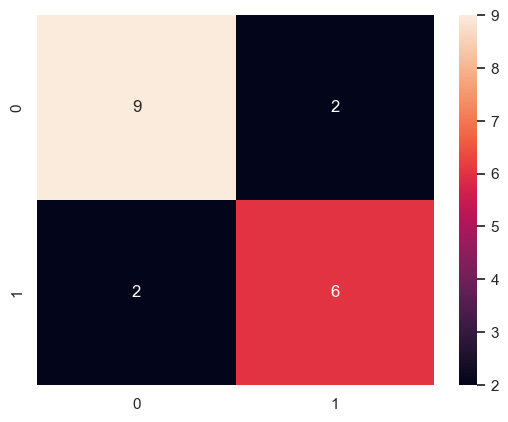

In [74]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Calculate cm by calling a method named as 'confusion_matrix'
cm = confusion_matrix(y_test_1, y_pred_1)

# Call a method heatmap() to plot confusion matrix
sns.heatmap(cm, annot = True)

# print the classification_report based on y_test and y_predict
print(classification_report(y_test_1, y_pred_1))

In [75]:
# Model Accuracy, how often is the classifier correct?

from sklearn import metrics                           # Import scikit-learn metrics module for accuracy calculation
import warnings
warnings.filterwarnings('ignore') # We can suppress the warnings
print("Accuracy:",metrics.accuracy_score(y_test_1, y_pred_1))

Accuracy: 0.7894736842105263


# RandomForestClassifier

In [76]:
# import Random Forest classifier

from sklearn.ensemble import RandomForestClassifier

# instantiate the classifier 
rfc = RandomForestClassifier(random_state=0)

# fit the model
rfc.fit(X_train_1, y_train_1)

# Predict the Test set results
y_pred_1 = rfc.predict(X_test_1)

# Check accuracy score 
from sklearn.metrics import accuracy_score

print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test_1, y_pred_1)))

Model accuracy score with 10 decision-trees : 0.8421


## Creating a K-Nearest Neighbor Classifier

In [77]:
from sklearn.neighbors import KNeighborsClassifier

In [78]:
neighbors = np.arange(1, 20)                  # number of neighbors
train_accuracy_1 = np.zeros(len(neighbors))    # Declare and initialise the matrix
test_accuracy_1 = np.zeros(len(neighbors))     # Declare and initialise the matrix

In [79]:
for i,k in enumerate(neighbors):                          # for loop that checks the model for neighbor values 1, 2, 3, ..., 9
    knn = KNeighborsClassifier(n_neighbors = k)           # Initialise an object knn using KNeighborsClassifier method

    #Fit the model
    knn.fit(X_train_1, y_train_1)                      # Call fit method to implement the ML KNeighborsClassifier model

    #Compute accuracy on the training set
    train_accuracy_1[i] = knn.score(X_train_1, y_train_1)      # Save the score value in the train_accuracy array

    #Compute accuracy on the test set
    test_accuracy_1[i] = knn.score(X_test_1, y_test_1)      # Save the score value in the train_accuracy array

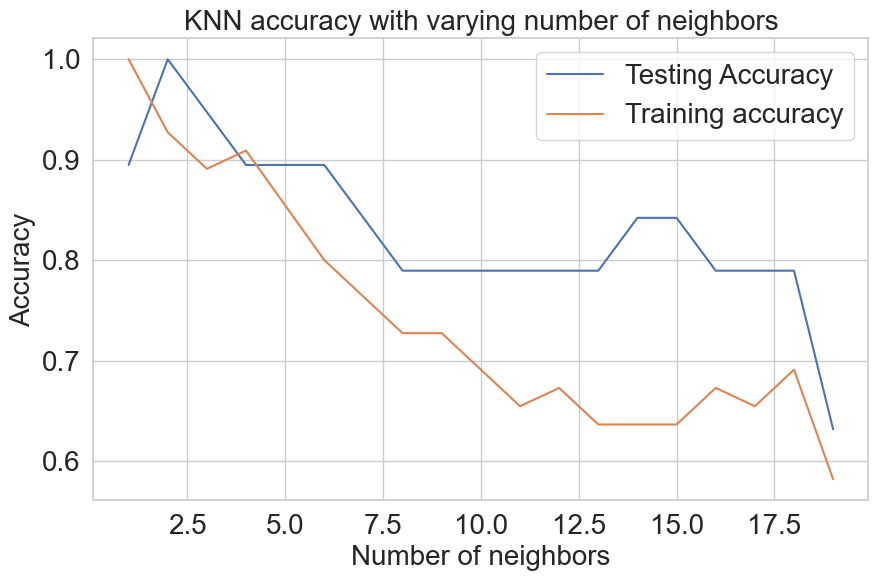

In [80]:
# Delcare the size of the array
plt.figure(figsize = (10, 6))
plt.title('KNN accuracy with varying number of neighbors', fontsize = 20)
plt.plot(neighbors, test_accuracy_1, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy_1, label = 'Training accuracy')
plt.legend(prop = {'size': 20})
plt.xlabel('Number of neighbors', fontsize = 20)
plt.ylabel('Accuracy', fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

In [81]:
# Declare and initialise an object 'KNeighborsClassifier' with 3 neighbors
knn = KNeighborsClassifier(n_neighbors = 3)

# Fit the model
knn.fit(X_train_1, y_train_1)   

# Compute accuracy on the training set
train_accuracy_1 = knn.score(X_train_1, y_train_1)   

# Compute accuracy on the test set
test_accuracy_1 = knn.score(X_test_1, y_test_1)  

In [82]:
# Display the test accuracy
print(test_accuracy_1)

0.9473684210526315


# Support Vector Machines

In [83]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
# Create an object svmModel by calling a method SVC()
svmModel = SVC(kernel = 'rbf',C = 2, gamma = 0.1)

# Train the model by calling a method fit()
svmModel.fit(X_test_1, y_test_1)  

# Store the predicted values into y_pred
Y_pred_1 = svmModel.predict(X_test_1)

# Display the accuracy upto 2 decimal places
print('Accuracy in SVC = ', round(accuracy_score(y_test_1, Y_pred_1)*100,2))

Accuracy in SVC =  89.47


# Really good results by adding more depeding variables

Let's also handle null values to see what is the outcome

In [84]:
df2a = df2c[df2c['Origin_or_Destination'] =='Emigrants: All destinations'] .copy()
df2b = df2[df2['Origin_or_Destination'] !='Emigrants: All destinations'] .copy()

In [85]:
df2a

,Year,Country,Sex,Origin_or_Destination,VALUE
1,1987,United Kingdom (1),Both sexes,Emigrants: All destinations,21800.0
10,1987,United States,Both sexes,Emigrants: All destinations,9900.0
19,1987,Canada,Both sexes,Emigrants: All destinations,NaN
28,1987,Australia,Both sexes,Emigrants: All destinations,NaN
37,1987,Other countries (23),Both sexes,Emigrants: All destinations,5400.0
...,...,...,...,...,...
2611,2023,Canada,Both sexes,Emigrants: All destinations,5300.0
2620,2023,Australia,Both sexes,Emigrants: All destinations,4700.0
2629,2023,Other countries (23),Both sexes,Emigrants: All destinations,11700.0
2647,2023,EU14 excl Irl (UK & Ireland),Both sexes,Emigrants: All destinations,13900.0


In [86]:

df2b 

,Year,Country,Sex,Origin_or_Destination,VALUE
2,1987,United Kingdom (1),Both sexes,Immigrants: All origins,8100.0
11,1987,United States,Both sexes,Immigrants: All origins,3000.0
20,1987,Canada,Both sexes,Immigrants: All origins,NaN
29,1987,Australia,Both sexes,Immigrants: All origins,NaN
38,1987,Other countries (23),Both sexes,Immigrants: All origins,4000.0
...,...,...,...,...,...
2612,2023,Canada,Both sexes,Immigrants: All origins,7200.0
2621,2023,Australia,Both sexes,Immigrants: All origins,7700.0
2630,2023,Other countries (23),Both sexes,Immigrants: All origins,75800.0
2648,2023,EU14 excl Irl (UK & Ireland),Both sexes,Immigrants: All origins,17700.0


In [87]:
pivot_df2a = df2a.pivot_table(index=['Year','Origin_or_Destination'],columns='Country', values='VALUE', aggfunc='sum').reset_index()
pivot_df2a.reset_index(inplace=True,drop=True)

In [88]:

pivot_df2b = df2b.pivot_table(index=['Year','Origin_or_Destination'],columns='Country', values='VALUE', aggfunc='sum').reset_index()
pivot_df2b.reset_index(inplace=True,drop=True)

In [89]:
pivot_df2a

Country,Year,Origin_or_Destination,Australia,Canada,EU14 excl Irl (UK & Ireland),EU15 to EU27 (membership after 2004),Other countries (23),United Kingdom (1),United States
0,1987,Emigrants: All destinations,0.0,0.0,3100.0,0.0,5400.0,21800.0,9900.0
1,1988,Emigrants: All destinations,0.0,0.0,2800.0,0.0,10200.0,40200.0,7900.0
2,1989,Emigrants: All destinations,0.0,0.0,3900.0,0.0,10000.0,48400.0,8200.0
3,1990,Emigrants: All destinations,0.0,0.0,5100.0,0.0,7600.0,35800.0,7700.0
4,1991,Emigrants: All destinations,0.0,0.0,3100.0,0.0,4400.0,23000.0,4800.0
5,1992,Emigrants: All destinations,0.0,0.0,7500.0,0.0,5500.0,16900.0,3500.0
6,1993,Emigrants: All destinations,0.0,0.0,7300.0,0.0,5800.0,16400.0,5600.0
7,1994,Emigrants: All destinations,0.0,0.0,5500.0,0.0,4900.0,14800.0,9600.0
8,1995,Emigrants: All destinations,0.0,0.0,5100.0,0.0,6600.0,13300.0,8200.0
9,1996,Emigrants: All destinations,0.0,0.0,5100.0,0.0,6800.0,14100.0,5200.0


In [90]:
pivot_df2b

Country,Year,Origin_or_Destination,Australia,Canada,EU14 excl Irl (UK & Ireland),EU15 to EU27 (membership after 2004),Other countries (23),United Kingdom (1),United States
0,1987,Immigrants: All origins,0.0,0.0,2200.0,0.0,4000.0,8100.0,3000.0
1,1988,Immigrants: All origins,0.0,0.0,2600.0,0.0,3400.0,9900.0,3400.0
2,1989,Immigrants: All origins,0.0,0.0,3600.0,0.0,5800.0,14200.0,3100.0
3,1990,Immigrants: All origins,0.0,0.0,5000.0,0.0,6900.0,17600.0,3900.0
4,1991,Immigrants: All origins,0.0,0.0,4200.0,0.0,6100.0,18700.0,4300.0
5,1992,Immigrants: All origins,0.0,0.0,6500.0,0.0,6900.0,22700.0,4600.0
6,1993,Immigrants: All origins,0.0,0.0,6600.0,0.0,5700.0,17500.0,5000.0
7,1994,Immigrants: All origins,0.0,0.0,5800.0,0.0,4800.0,15200.0,4300.0
8,1995,Immigrants: All origins,0.0,0.0,6300.0,0.0,5500.0,15600.0,3800.0
9,1996,Immigrants: All origins,0.0,0.0,7200.0,0.0,8000.0,17600.0,6400.0


In [91]:

def fill_null_with_mode_values(pivot_df2a, columns):
    for col in columns:
        pivot_df2a[col] = pivot_df2a[col].replace(0, pd.NA)  # Convert 0 to pd.NA to ensure that 0 values are treated as NaN
        mode_value = pivot_df2a[col].mode().iloc[0]  # Get the mode of the column
        null_indexes = pivot_df2a[col].isnull()  # Get the indexes of NaN values
        pivot_df2a.loc[null_indexes, col] = mode_value  # Replace NaN values with the mode value
    return pivot_df2a

# Example usage
# Assuming pivot_df2a is your DataFrame and columns_to_fill are the columns you want to fill with mode values
columns_to_fill = ['Australia', 'Canada', 'EU15 to EU27 (membership after 2004)']

pivot_df2a = fill_null_with_mode_values(pivot_df2a, columns_to_fill)



In [92]:
def fill_null_with_mode_values(pivot_df2b, columns):
    for col in columns:
        pivot_df2b[col] = pivot_df2b[col].replace(0, pd.NA)  # Convert 0 to pd.NA to ensure that 0 values are treated as NaN
        mode_value = pivot_df2b[col].mode().iloc[0]  # Get the mode of the column
        null_indexes = pivot_df2b[col].isnull()  # Get the indexes of NaN values
        pivot_df2b.loc[null_indexes, col] = mode_value  # Replace NaN values with the mode value
    return pivot_df2b

# Example usage
# Assuming pivot_df2b is your DataFrame and columns_to_fill are the columns you want to fill with mode values
columns_to_fill = ['Australia', 'Canada', 'EU15 to EU27 (membership after 2004)']

pivot_df2b = fill_null_with_mode_values(pivot_df2b, columns_to_fill)




In [93]:
pivot_df2b

Country,Year,Origin_or_Destination,Australia,Canada,EU14 excl Irl (UK & Ireland),EU15 to EU27 (membership after 2004),Other countries (23),United Kingdom (1),United States
0,1987,Immigrants: All origins,5400.0,2200.0,2200.0,8700.0,4000.0,8100.0,3000.0
1,1988,Immigrants: All origins,5400.0,2200.0,2600.0,8700.0,3400.0,9900.0,3400.0
2,1989,Immigrants: All origins,5400.0,2200.0,3600.0,8700.0,5800.0,14200.0,3100.0
3,1990,Immigrants: All origins,5400.0,2200.0,5000.0,8700.0,6900.0,17600.0,3900.0
4,1991,Immigrants: All origins,5400.0,2200.0,4200.0,8700.0,6100.0,18700.0,4300.0
5,1992,Immigrants: All origins,5400.0,2200.0,6500.0,8700.0,6900.0,22700.0,4600.0
6,1993,Immigrants: All origins,5400.0,2200.0,6600.0,8700.0,5700.0,17500.0,5000.0
7,1994,Immigrants: All origins,5400.0,2200.0,5800.0,8700.0,4800.0,15200.0,4300.0
8,1995,Immigrants: All origins,5400.0,2200.0,6300.0,8700.0,5500.0,15600.0,3800.0
9,1996,Immigrants: All origins,5400.0,2200.0,7200.0,8700.0,8000.0,17600.0,6400.0


In [94]:
# Encoding Emigrants: All destinations = 0
pivot_df2a['Origin_or_Destination'] = pivot_df2a['Origin_or_Destination'].replace({'Emigrants: All destinations': 0})

In [95]:
# Encoding Emigrants: All destinations = 0
pivot_df2b['Origin_or_Destination'] = pivot_df2b['Origin_or_Destination'].replace({'Immigrants: All origins': 1})

In [96]:

# concatenating the two dataframes

df2d = pd.concat([pivot_df2a,pivot_df2b])


In [97]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

df2d = df2d.sort_values('Year',ascending=True)
df2d

Country,Year,Origin_or_Destination,Australia,Canada,EU14 excl Irl (UK & Ireland),EU15 to EU27 (membership after 2004),Other countries (23),United Kingdom (1),United States
0,1987,0,10400.0,1100.0,3100.0,800.0,5400.0,21800.0,9900.0
0,1987,1,5400.0,2200.0,2200.0,8700.0,4000.0,8100.0,3000.0
1,1988,0,10400.0,1100.0,2800.0,800.0,10200.0,40200.0,7900.0
1,1988,1,5400.0,2200.0,2600.0,8700.0,3400.0,9900.0,3400.0
2,1989,0,10400.0,1100.0,3900.0,800.0,10000.0,48400.0,8200.0
2,1989,1,5400.0,2200.0,3600.0,8700.0,5800.0,14200.0,3100.0
3,1990,0,10400.0,1100.0,5100.0,800.0,7600.0,35800.0,7700.0
3,1990,1,5400.0,2200.0,5000.0,8700.0,6900.0,17600.0,3900.0
4,1991,0,10400.0,1100.0,3100.0,800.0,4400.0,23000.0,4800.0
4,1991,1,5400.0,2200.0,4200.0,8700.0,6100.0,18700.0,4300.0


In [98]:
X1 = df2d.iloc[:, [2,3,4,5,6,7,8]].values

In [99]:
y1 = pivot_df2.iloc[:, 1].values

In [100]:
X1

array([[10400.0, 1100.0, 3100.0, 800.0, 5400.0, 21800.0, 9900.0],
       [5400.0, 2200.0, 2200.0, 8700.0, 4000.0, 8100.0, 3000.0],
       [10400.0, 1100.0, 2800.0, 800.0, 10200.0, 40200.0, 7900.0],
       [5400.0, 2200.0, 2600.0, 8700.0, 3400.0, 9900.0, 3400.0],
       [10400.0, 1100.0, 3900.0, 800.0, 10000.0, 48400.0, 8200.0],
       [5400.0, 2200.0, 3600.0, 8700.0, 5800.0, 14200.0, 3100.0],
       [10400.0, 1100.0, 5100.0, 800.0, 7600.0, 35800.0, 7700.0],
       [5400.0, 2200.0, 5000.0, 8700.0, 6900.0, 17600.0, 3900.0],
       [10400.0, 1100.0, 3100.0, 800.0, 4400.0, 23000.0, 4800.0],
       [5400.0, 2200.0, 4200.0, 8700.0, 6100.0, 18700.0, 4300.0],
       [10400.0, 1100.0, 7500.0, 800.0, 5500.0, 16900.0, 3500.0],
       [5400.0, 2200.0, 6500.0, 8700.0, 6900.0, 22700.0, 4600.0],
       [5400.0, 2200.0, 6600.0, 8700.0, 5700.0, 17500.0, 5000.0],
       [10400.0, 1100.0, 7300.0, 800.0, 5800.0, 16400.0, 5600.0],
       [10400.0, 1100.0, 5500.0, 800.0, 4900.0, 14800.0, 9600.0],
       [54

In [101]:
y1

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1])


## Splitting the dataset into the Training set and Test set

In [102]:

from sklearn.model_selection import train_test_split
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X1, y1, test_size = 0.25, random_state = 0)


## Feature Scaling

In [103]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_1 = sc.fit_transform(X_train_1)
X_test_1 = sc.transform(X_test_1)

# DecisionTreeClassifier

## Training the Decision Tree Classification model on the Training set


In [104]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(max_depth = 3, random_state = 0)
classifier.fit(X_train_1, y_train_1)


DecisionTreeClassifier(max_depth=3, random_state=0)

# Predicting the Test set results

In [105]:
y_pred_1 = classifier.predict(X_test_1)

## Making the Confusion Matrix

              precision    recall  f1-score   support

           0       0.67      0.18      0.29        11
           1       0.44      0.88      0.58         8

    accuracy                           0.47        19
   macro avg       0.55      0.53      0.43        19
weighted avg       0.57      0.47      0.41        19



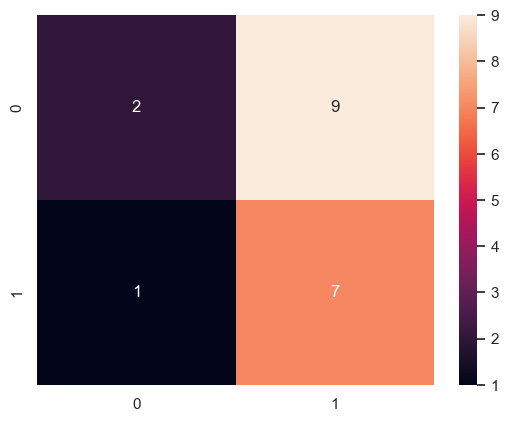

In [106]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
# Calculate cm by calling a method named as 'confusion_matrix'
cm = confusion_matrix(y_test_1, y_pred_1)
# Call a method heatmap() to plot confusion matrix
sns.heatmap(cm, annot = True)
# print the classification_report based on y_test and y_predict
print(classification_report(y_test_1, y_pred_1))


# Model Accuracy, how often is the classifier correct?

In [107]:

from sklearn import metrics                           # Import scikit-learn metrics module for accuracy calculation
import warnings
warnings.filterwarnings('ignore') # We can suppress the warnings
print("Accuracy:",metrics.accuracy_score(y_test_1, y_pred_1))

Accuracy: 0.47368421052631576


# RandomForestClassifier

In [108]:
# import Random Forest classifier
from sklearn.ensemble import RandomForestClassifier
# instantiate the classifier 
rfc = RandomForestClassifier(random_state=0)
# fit the model
rfc.fit(X_train_1, y_train_1)
# Predict the Test set results
y_pred_1 = rfc.predict(X_test_1)
# Check accuracy score 
from sklearn.metrics import accuracy_score
print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test_1, y_pred_1)))

Model accuracy score with 10 decision-trees : 0.6842



## Creating a K-Nearest Neighbor Classifier


In [109]:
from sklearn.neighbors import KNeighborsClassifier

In [110]:
neighbors = np.arange(1, 20)                  # number of neighbors
train_accuracy_1 = np.zeros(len(neighbors))    # Declare and initialise the matrix
test_accuracy_1 = np.zeros(len(neighbors))     # Declare and initialise the matrix

In [111]:
for i,k in enumerate(neighbors):                          # for loop that checks the model for neighbor values 1, 2, 3, ..., 9
    knn = KNeighborsClassifier(n_neighbors = k)           # Initialise an object knn using KNeighborsClassifier method
    #Fit the model
    knn.fit(X_train_1, y_train_1)                      # Call fit method to implement the ML KNeighborsClassifier model
    #Compute accuracy on the training set
    train_accuracy_1[i] = knn.score(X_train_1, y_train_1)      # Save the score value in the train_accuracy array
    #Compute accuracy on the test set
    test_accuracy_1[i] = knn.score(X_test_1, y_test_1)      # Save the score value in the train_accuracy array

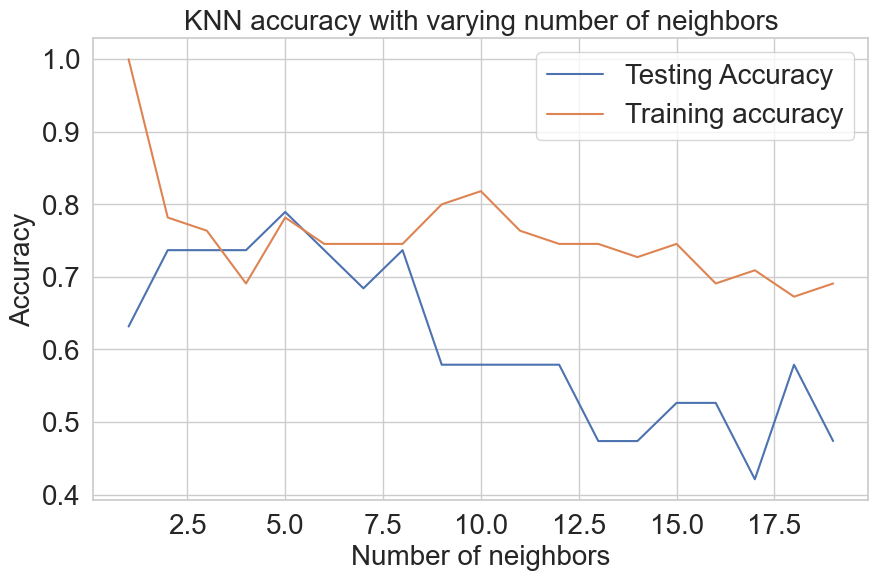

In [112]:
# Delcare the size of the array
plt.figure(figsize = (10, 6))
plt.title('KNN accuracy with varying number of neighbors', fontsize = 20)
plt.plot(neighbors, test_accuracy_1, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy_1, label = 'Training accuracy')
plt.legend(prop = {'size': 20})
plt.xlabel('Number of neighbors', fontsize = 20)
plt.ylabel('Accuracy', fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

In [113]:
# Declare and initialise an object 'KNeighborsClassifier' with 3 neighbors
knn = KNeighborsClassifier(n_neighbors = 5)
# Fit the model
knn.fit(X_train_1, y_train_1)   
# Compute accuracy on the training set
train_accuracy_1 = knn.score(X_train_1, y_train_1)   
# Compute accuracy on the test set
test_accuracy_1 = knn.score(X_test_1, y_test_1)  

In [114]:
# Display the test accuracy
print(test_accuracy_1)


0.7894736842105263



# Support Vector Machines

In [115]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
# Create an object svmModel by calling a method SVC()
svmModel = SVC(kernel = 'rbf',C = 2, gamma = 0.1)
# Train the model by calling a method fit()
svmModel.fit(X_test_1, y_test_1)  
# Store the predicted values into y_pred
Y_pred_1 = svmModel.predict(X_test_1)
# Display the accuracy upto 2 decimal places
print('Accuracy in SVC = ', round(accuracy_score(y_test_1, Y_pred_1)*100,2))

Accuracy in SVC =  89.47


# GridSearchCV 6_30_Oct_05Nov_2023 CASE STUDY (Non Linear SVM) & CASE STUDY (Linear SVM).

Clear examples of how to apply GridSearchCV